0.02937602996826172
0.017194747924804688
0.016393661499023438
0.01708984375
0.016933441162109375
0.016779184341430664
0.016736745834350586
0.016793251037597656
0.016434907913208008
0.016060829162597656
0.01711273193359375
0.0169985294342041
0.01637744903564453
0.01613759994506836
0.017173290252685547
0.016611814498901367
0.017248153686523438
0.016562938690185547
0.01640629768371582
0.017322540283203125
0.017165184020996094
0.015869855880737305
0.016202688217163086
0.017075777053833008
0.017717838287353516
0.01685190200805664
0.015579938888549805
0.017240047454833984
0.016871929168701172
0.016592979431152344
0.016927480697631836
0.01628589630126953
0.016246557235717773
0.017179012298583984
0.016741275787353516
0.01583385467529297
0.01754903793334961
0.017269372940063477
0.014663934707641602
0.017830610275268555
0.01680135726928711
0.01587057113647461
0.017518281936645508
0.016024351119995117
0.017101049423217773
0.017528533935546875
0.015918493270874023
0.01642632484436035
0.01734805107

0.016614198684692383
0.01625800132751465
0.01679205894470215
0.016927480697631836
0.01661849021911621
0.016227006912231445
0.016449451446533203
0.0175783634185791
0.016469955444335938
0.01641988754272461
0.016756534576416016
0.016801834106445312
0.01649332046508789
0.016993999481201172
0.016551494598388672
0.01691412925720215
0.016336917877197266
0.017327308654785156
0.016707897186279297
0.016277313232421875
0.016388893127441406
0.016829729080200195
0.01617908477783203
0.016929149627685547
0.016762256622314453
0.01692938804626465
0.01662158966064453
0.016760826110839844
0.017231464385986328
0.016008615493774414
0.017034530639648438
0.016333818435668945
0.016956567764282227
0.016254186630249023
0.0163419246673584
0.01662302017211914
0.017071962356567383
0.017044782638549805
0.01639080047607422
0.016674518585205078
0.016945600509643555
0.016843557357788086
0.015845060348510742
0.01762533187866211
0.016070842742919922
0.016537904739379883
0.017208337783813477
0.016300439834594727
0.016497

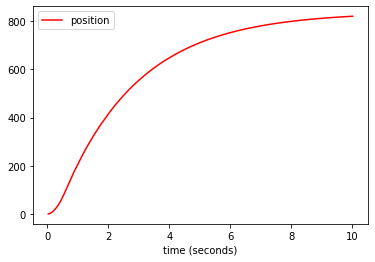

In [1]:
import sys
sys.path.append("../../")

from lib.data.dataplot import *
from lib.dds.dds import *
from lib.utils.time import *

dp = DataPlotter()
dp.set_x("time (seconds)")
dp.add_y("pos", "position")

dds = DDS()
dds.start()

dds.subscribe(['position'])
dds.publish('force', 5000.0, DDS.DDS_TYPE_FLOAT)

t = Time()
t.start()
while t.get() < 10:
    
    p = dds.wait('position')
    
    delta_t = t.elapsed()
    print(delta_t)

    dds.publish('force', 0.0, DDS.DDS_TYPE_FLOAT)
    
    dp.append_x(t.get())
    dp.append_y("pos", p)

dp.plot()
